In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [74]:
titanic_ship = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [75]:
titanic_ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
titanic_ship.shape

(891, 12)

In [77]:
titanic_ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Four columns contains string and rest contains numerical values

In [78]:
titanic_ship.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Out of 891 entries 687 are null in Cabin column, 177 null values in Age and 2 null values in Embarked

<AxesSubplot:xlabel='Survived', ylabel='count'>

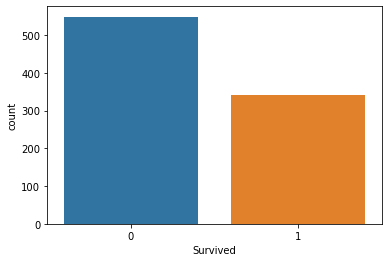

In [79]:
sns.countplot(x='Survived', data = titanic_ship)

Number of people who survived are less than number of people who died.

In [80]:
titanic_ship['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

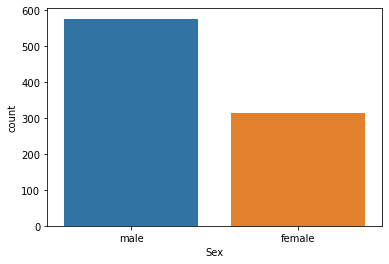

In [81]:
sns.countplot(x='Sex', data = titanic_ship)

More number of males than females were in the ship.

In [82]:
titanic_ship['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

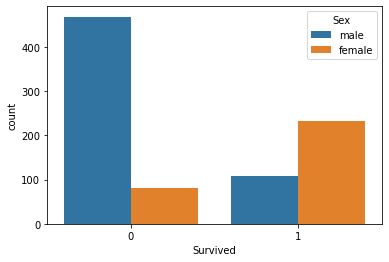

In [83]:
sns.countplot(x='Survived',hue = 'Sex',data = titanic_ship)

More number of females survived than males

<AxesSubplot:xlabel='Pclass', ylabel='count'>

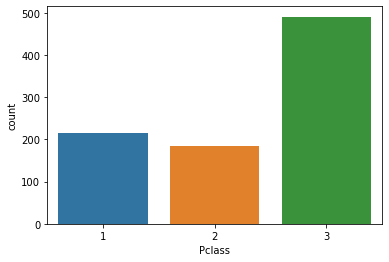

In [84]:
sns.countplot(x='Pclass', data = titanic_ship)

Maximum passengers travelled in Class 3

<AxesSubplot:xlabel='Pclass', ylabel='count'>

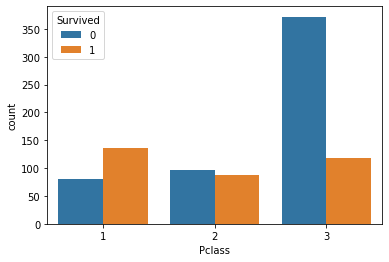

In [85]:
sns.countplot(x='Pclass',hue = 'Survived',data = titanic_ship)

As maximum passengers travelled in Class 3 therefore most passengers did not survive in Class 3

In [86]:
titanic_ship = titanic_ship.drop(columns='Cabin', axis=1)

Out of 891 entries 687 are null in Cabin column, so considered to drop the column

In [87]:
titanic_ship['Age'].fillna(titanic_ship['Age'].mean(), inplace = True)

In [88]:
print(titanic_ship['Embarked'].mode())

0    S
dtype: object


In [89]:
titanic_ship['Embarked'].fillna(titanic_ship['Embarked'].mode()[0], inplace = True)

In [90]:
titanic_ship.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [91]:
Embark = pd.get_dummies(titanic_ship['Embarked'])

In [92]:
sex = pd.get_dummies(titanic_ship['Sex'])

In [93]:
titanic_ship.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)
titanic_ship

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


Name,Ticket and PassengerId can not decide if a person will survive or not. So dropped those columns.

In [94]:
titanic_ship = pd.concat([titanic_ship,sex,Embark], axis=1)

In [95]:
titanic_ship.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [96]:
titanic_ship.drop('Survived', axis =1).head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [97]:
y  = titanic_ship['Survived']
X  = titanic_ship.drop('Survived', axis=1)

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = 345)
y_train.head()

724    1
256    1
591    1
576    1
531    0
Name: Survived, dtype: int64

In [102]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [103]:
y_pred = log_reg.predict(x_test)

In [104]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7847533632286996

Accuracy for LogisticRegression is 78%, which is not very good.

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

In [107]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[122,  26],
       [ 22,  53]])

In [108]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
false_positive = conf_mat[1][1]

In [109]:
Precision = true_positive/(true_positive+false_negative)
Precision

0.8472222222222222

In [110]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8472222222222222

In [111]:
F1_score = 2*(Recall * Precision) / (Recall + Precision)
F1_score

0.8472222222222222

In [ ]:
#Though Precision, F1 and Recall scores are equal. I would rather go ahead with F1 score to reduce any risk

In [112]:
from sklearn.feature_selection import SelectKBest, f_classif

In [116]:
best_features = SelectKBest(score_func=f_classif, k=6)
fit = best_features.fit(X,y)
titanic_ship_scores = pd.DataFrame(fit.scores_)
titanic_ship_columns = pd.DataFrame(X.columns)
features_scores = pd.concat([titanic_ship_columns, titanic_ship_scores], axis=1)
features_scores.columns = ["Feature_Name", 'Score']
print(features_scores.nlargest(6,"Score"))

  Feature_Name       Score
5       female  372.405724
6         male  372.405724
0       Pclass  115.031272
4         Fare   63.030764
7            C   25.895987
9            S   20.374460


From the above feature engineering technique, I select k=6

In [120]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [121]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [122]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[112,  24],
       [ 19,  68]])

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       136
           1       0.74      0.78      0.76        87

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



f1 score after using knn is 81 %, which means our model is a good model. But there is a chance of overfitting also.

In [124]:
cross_val_score(knn, X_scaled, y, cv=5)
cross_val_score(KNeighborsClassifier(), X_scaled, y, cv=5).mean()

0.8036093151716777

In [125]:
from sklearn.ensemble import BaggingClassifier

In [126]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators=10, max_samples=0.5,
                           bootstrap=True, random_state=3, oob_score=True)

In [127]:
bag_knn.oob_score

True

In [128]:
bag_knn.fit(x_train, y_train)
bag_knn.score(x_test, y_test)

0.7802690582959642

The score did not increase using BaggingClassifier

In [129]:
clf = RandomForestClassifier()

params = {'n_estimators': [13,15],
         'criterion': ['entropy'],
         'max_depth':  [10,15],
         'min_samples_split': [10,11],
         'min_samples_leaf': [5,6]
         }

grd = GridSearchCV(clf,param_grid = params)
grd.fit(x_train,y_train)
print('best_params =>', grd.best_params_)
clf = grd.best_estimator_
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
rf_conf_mat = confusion_matrix(y_test,y_pred)
print(rf_conf_mat)
print(y_test,y_pred)

best_params => {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}
[[117  19]
 [ 25  62]]
500    0
417    1
432    1
881    0
49     0
      ..
23     1
413    0
871    1
835    1
670    1
Name: Survived, Length: 223, dtype: int64 [0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0
 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0
 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 1]


In [130]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       136
           1       0.77      0.71      0.74        87

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



With RandomForestClassifier accuracy is 80%

In [131]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [132]:
lr.fit(x_train,y_train)
kn.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [133]:
lr.score(x_train,y_train)

0.7979041916167665

In [134]:
kn.score(x_train,y_train)

0.842814371257485

In [135]:
rf.score(x_train,y_train)

0.9835329341317365

Since, my RandomForest model is giving accuracy of 98%. It shows the model is performimg well

In [136]:
import pickle
filename = 'happiness.pkl'
pickle.dump(rf, open(filename, 'wb'))